In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#读取数据
train_datas=pd.read_excel('./datas/train.xlsx')
valid_datas=pd.read_excel('./datas/valid.xlsx')
test_datas=pd.read_excel('./datas/test.xlsx')
tag=pd.read_excel('./datas/tag.xlsx')

In [3]:
feat2name=dict()
for index,row in tag.iterrows():
    if(index==0):continue
    feat2name[row['字段']]=row['字段说明']
feat2name

{'feat1': '电池可以一次性存储的总能量，单位为mAh',
 'feat2': '是否有蓝牙',
 'feat3': '微处理器执行指令的速度',
 'feat4': '有双SIM卡支持与否',
 'feat5': '前置摄像头百万像素',
 'feat6': '是否支持4G',
 'feat7': '内存（以GB为单位）',
 'feat8': '移动深度（cm）',
 'feat9': '重量',
 'feat10': '处理器核心数',
 'feat11': '主要相机百万像素',
 'feat12': '像素分辨率高度',
 'feat13': '像素分辨率宽度',
 'feat14': '以兆字节为单位的随机存取存储器',
 'feat15': '屏幕高度（以cm为单位）',
 'feat16': '屏幕宽度（以cm为单位）',
 'feat17': '单个电池充电时间最长的时间',
 'feat18': '是否有3G',
 'feat19': '是否有触摸屏',
 'feat20': '是否有wifi',
 'price': '价格分档，取值为0,1,2,3'}

In [4]:
#绘制相关性热力图
def plot_Density(datas,prices,xlabel,ylabel,title):
    matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
    matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
    sns.kdeplot(datas,prices, shade=True, color="g", alpha=.7)
    # 显示横轴标签
    plt.xlabel(xlabel)
    # 显示纵轴标签
    plt.ylabel(ylabel)
    # 显示图标题
    plt.title(title)
    # 显示图例
    plt.legend()
    plt.show()    

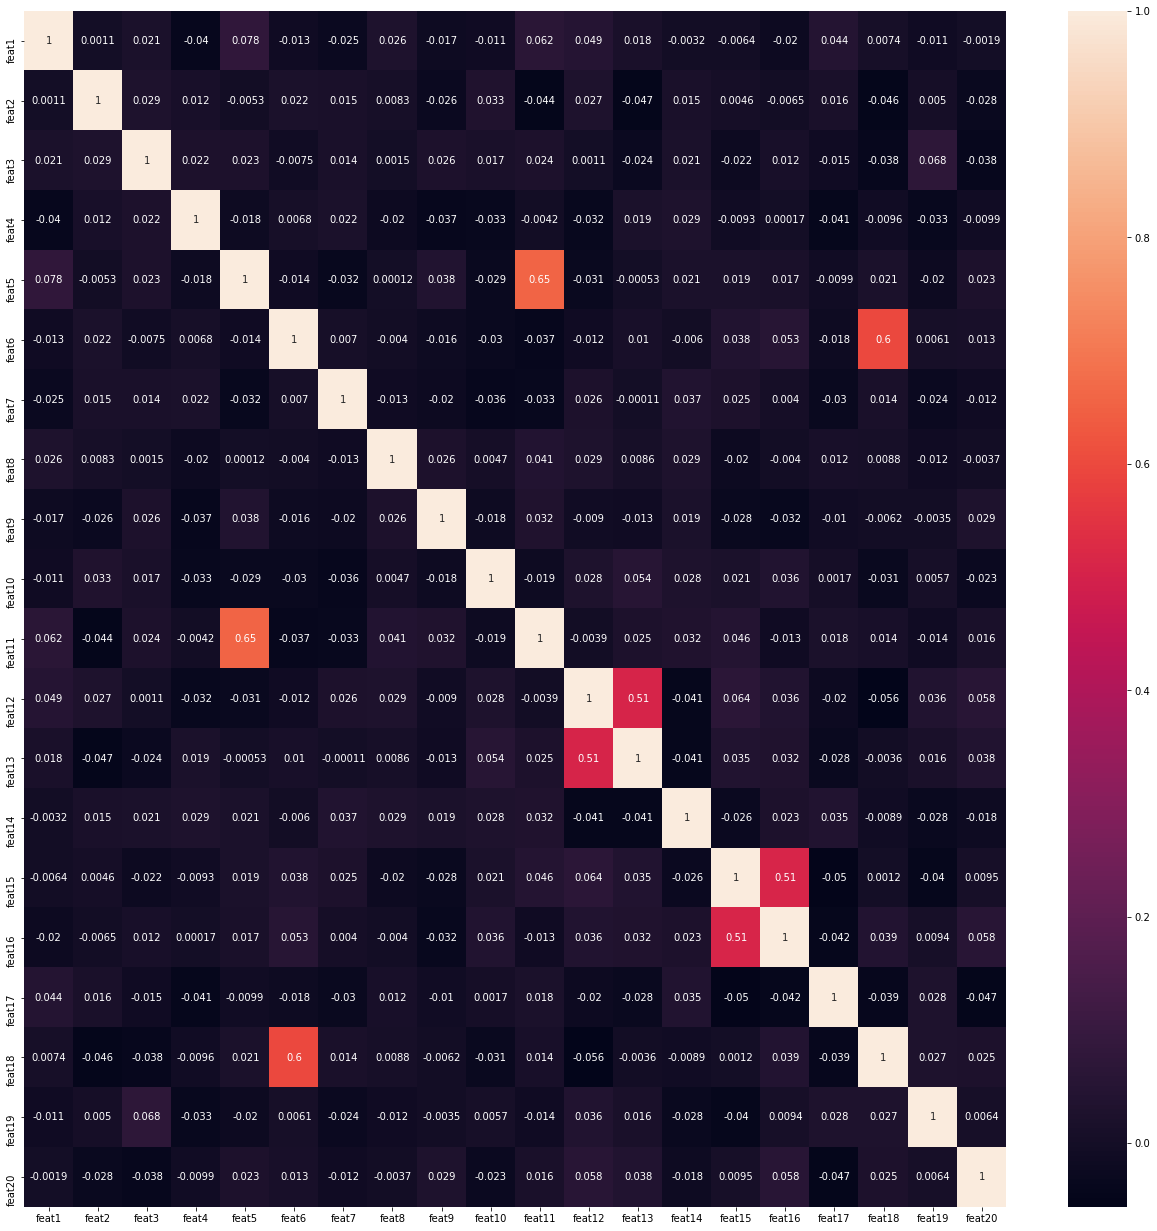

In [5]:
#相关性热力图
corr_datas=train_datas.iloc[:,1:-1].corr()
plt.figure(figsize=(22, 22))
sns.heatmap(corr_datas,annot=True)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import  validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [7]:
def double_plot(train_size,train_acc_mean,test_acc_mean,label):
#-----------------------------------
    plt.figure(figsize=(18, 6))
    # 标题
    plt.title("")
    # 数据
    plt.plot(train_size, train_acc_mean, 'o-',color='r',label='Training')
    plt.plot(train_size, test_acc_mean, 'o-',color='g',label='10k_Cross-validation')
    # 横坐标描述
    plt.xlabel('train_example',fontsize=16)
    # 纵坐标描述
    plt.ylabel(label,fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # 设置数字标签
    for a, b in zip(train_size, train_acc_mean):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)

    for a, b in zip(train_size, test_acc_mean):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    plt.legend(loc='best')
    plt.show()

# 特征筛选

In [8]:
#分离数据和标签
y=train_datas.values[:,-1]
x=train_datas.values[:,:-1]
vy=valid_datas.values[:,-1]
vx=valid_datas.values[:,:-1]

In [9]:
#移除低方差特征
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
newx=sel.fit_transform(x)
newvx=sel.transform(vx)
newx.shape,newvx.shape

((1200, 20), (300, 20))

In [10]:
#基于 L1 的特征选取
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
newx=x
newvx=vx
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(newx, y)
model = SelectFromModel(lsvc, prefit=True)
newx = model.transform(newx)
newvx = model.transform(newvx)
newx.shape,newvx.shape

((1200, 13), (300, 13))

In [11]:
#基于 Tree（树）的特征选取
from sklearn.ensemble import ExtraTreesClassifier
newx=x
newvx=vx
clf = ExtraTreesClassifier()
clf = clf.fit(newx, y)
model = SelectFromModel(clf, prefit=True)
newx = model.transform(newx)
newvx=model.transform(newvx)
newx.shape,newvx.shape,clf.feature_importances_

D:\work\program\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


((1200, 2),
 (300, 2),
 array([0.03630151, 0.05551085, 0.0187757 , 0.0380608 , 0.02054665,
        0.03646801, 0.01747748, 0.03300008, 0.03257117, 0.03946157,
        0.03461717, 0.03255125, 0.04426709, 0.0466812 , 0.34746846,
        0.0378811 , 0.03259255, 0.03783872, 0.01669149, 0.0219833 ,
        0.01925384]))

In [67]:
#单变量特征选择
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
newx=x
newvx=vx
sb=SelectKBest(chi2, k=12)
newx=sb.fit_transform(x, y)
newvx=sb.transform(newvx)
newx.shape,newvx.shape

((1200, 12), (300, 12))

In [75]:
from sklearn.linear_model import LogisticRegression
#标准化
ss=StandardScaler()#标准化器
snewx=ss.fit_transform(newx)
snewvx=ss.transform(newvx)
Svaliddatas=snewvx
valid_labels=vy
Straindatas=snewx

train_labels=y
#进行特征筛选后的简单测试
k_num=10
#使用逻辑回归
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
classifier.fit(snewx, y)
acc = classifier.score(snewvx,vy)
score=cross_val_score(classifier,snewx,y,cv=k_num)

print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.85，10折交叉验证准确率0.8433232100589864


# 特征筛选结束，各类模型的训练

In [76]:
#经过特征工程确定的需要删除的无关特征,进行标准化
ss=StandardScaler()#标准化器
#数据标准化
ss=StandardScaler()#标准化器
Straindatas=ss.fit_transform(newx)
Svaliddatas=ss.transform(newvx)
train_labels=y
valid_labels=vy
print('原数据的维度：{0},经过标准化后的新数据的维度：{1}'.format(train_datas.shape,Straindatas.shape))

原数据的维度：(1200, 22),经过标准化后的新数据的维度：(1200, 12)


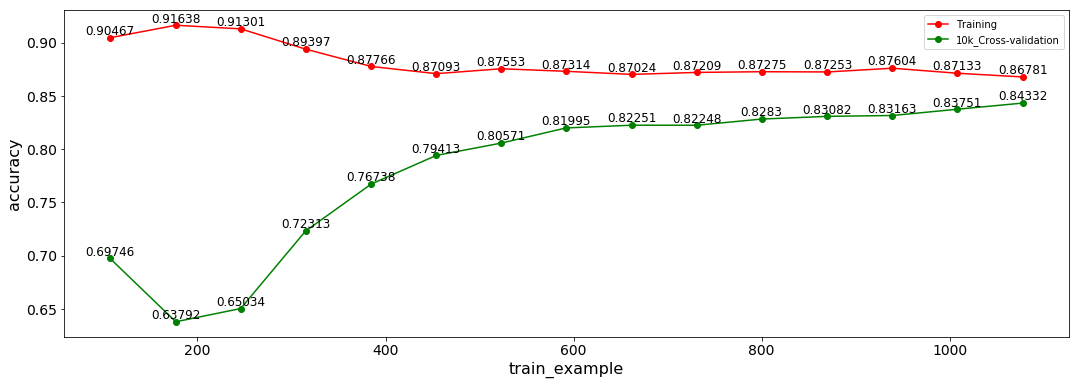

In [78]:
#学习曲线，查看对应不同训练数据量对模型的影响
#引入数据

k_num=10
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
train_size,train_acc,test_acc=learning_curve(
    classifier,Straindatas,train_labels,cv=k_num,scoring='accuracy',#neg_mean_squared_error
    train_sizes=np.linspace(0.1, 1.0, 15)
)

#对每次k折交叉验证的结果求平均
#求准确率
train_acc_mean= np.around(np.mean(train_acc,axis=1), decimals=5)
test_acc_mean=np.around(np.mean(test_acc,axis=1), decimals=5)
double_plot(train_size,train_acc_mean,test_acc_mean,'accuracy')

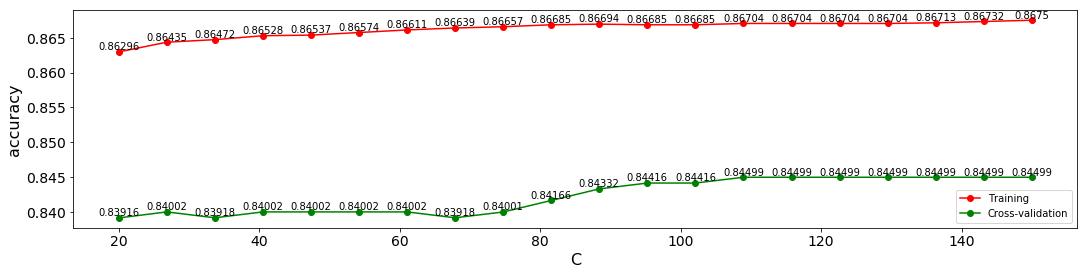

In [80]:
#验证曲线，对应正则化参数取值对模型的影响
import warnings
warnings.filterwarnings("ignore")
#改变param来观察Loss函数情况
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
param_range=np.linspace(20,150,20)

train_,test_=validation_curve(
    classifier,Straindatas,train_labels,param_name='C',param_range=param_range,cv=k_num,
    scoring='accuracy'#neg_mean_squared_error
)
train_mean=np.around(np.mean(train_,axis=1),decimals=5)
test_mean=np.around(np.mean(test_,axis=1),decimals=5)


#绘图
plt.figure(figsize=(18, 4))
# 标题
plt.title("")
# 数据
plt.plot(param_range,train_mean,'o-',color='r',label='Training')
plt.plot(param_range,test_mean,'o-',color='g',label='Cross-validation')
# 横坐标描述
plt.xlabel('C',fontsize=16)
# 纵坐标描述
plt.ylabel('accuracy',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# 设置数字标签
for a, b in zip(param_range, train_mean):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

for a, b in zip(param_range, test_mean):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

plt.legend(loc='best')
plt.show()


In [123]:
#k近邻
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=100)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.6766666666666666，10折交叉验证准确率0.6974890569965962


In [81]:
k_num=10
#使用逻辑回归
classifier=LogisticRegression(solver="newton-cg",C=95,max_iter=20)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.85，10折交叉验证准确率0.8433232100589864


In [82]:
#使用神经网络
from sklearn.neural_network import MLPClassifier
classifier=MLPClassifier(solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(40, 4), random_state=1)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.9266666666666666，10折交叉验证准确率0.9475037817592827


In [94]:
#决策树
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=None, min_samples_split=4,random_state=1)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.7333333333333333，10折交叉验证准确率0.8124624385725026


In [97]:
#集成学习-随机森林
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.8533333333333334，10折交叉验证准确率0.820065182691421


In [100]:
##集成学习-adaboost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=40)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.7，10折交叉验证准确率0.6403712366941086


In [107]:
#梯度提升树
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=200, learning_rate=0.5,max_depth=4, random_state=4)
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

验证集准确率：0.8533333333333334，10折交叉验证准确率0.857697208405107


In [117]:
#SVC
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
classifier =SVC(gamma='auto',C=0.55) 
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))


验证集准确率：0.8833333333333333，10折交叉验证准确率0.8833468664528539


In [121]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
classifier = XGBClassifier(learning_rate=0.05,
                      n_estimators=1000,         # 树的个数--1000棵树建立xgboost
                      max_depth=6,               # 树的深度
                      min_child_weight = 2,      # 叶子节点最小权重
                      gamma=0.5,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.8,             # 随机选择80%样本建立决策树
                      colsample_btree=0.8,       # 随机选择80%特征建立决策树
                      objective='multi:softmax', # 指定损失函数
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=27            # 随机数
                      )
classifier.fit(Straindatas, train_labels)
acc = classifier.score(Svaliddatas,valid_labels)
score=cross_val_score(classifier,Straindatas,train_labels,cv=k_num)
print('验证集准确率：{0}，10折交叉验证准确率{1}'.format(acc,score.mean()))

[23:32:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:33:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:33:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_btree, scale_pos_weight } might not be used.

  This

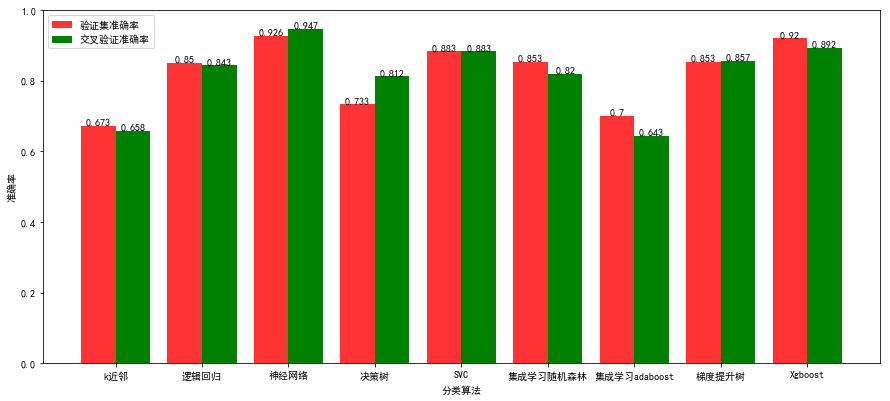

In [122]:
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 6.5))
label_list=['k近邻',
'逻辑回归',
'神经网络',
'决策树',
'SVC',
'集成学习随机森林',
'集成学习adaboost',
'梯度提升树',
'Xgboost']# 横坐标刻度显示值
num_list1 = [0.673,
 0.85,
 0.926,
 0.733,
 0.883,
 0.853,
 0.7,
 0.853,
 0.92
]      # 纵坐标值1
num_list2 = [
0.658,
0.843,
0.947,
0.812,
0.883,
0.82,
0.643,
0.857,
0.892
]      # 纵坐标值2
x = range(len(num_list1))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
rects1 = plt.bar(left=x, height=num_list1, width=0.4, alpha=0.8, color='red', label="验证集准确率")
rects2 = plt.bar(left=[i + 0.4 for i in x], height=num_list2, width=0.4, color='green', label="交叉验证准确率")
plt.ylim(0, 1)     # y轴取值范围
plt.ylabel("准确率")
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([index + 0.2 for index in x], label_list)
plt.xlabel("分类算法")

plt.legend()     # 设置题注
# 编辑文本
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom")
plt.show()
